## Machine Learning Model for Cyberattack Detection and Classification

**Authors:** Conner Jordan, Matt Perona, Nathan Nawrocki

## Introduction

We aim to develop a machine learning model capable of identifying and classifying various types of cyberattacks using the Incribo synthetic cybersecurity dataset. By leveraging both supervised and unsupervised learning techniques, we will build a system that not only recognizes known attack signatures but also detects anomalies indicative of potential zero-day attacks. This project will enhance our understanding of cybersecurity threats and contribute to the development of more robust defense mechanisms.

## Dataset

The dataset used in this project is the Incribo synthetic cyber dataset from Kaggle, which consists of 25 varied metrics and 40,000 records. The dataset simulates real-world cyberattack scenarios and includes metrics such as timestamps, IP addresses, ports, protocols, packet lengths, malware indicators, anomaly scores, and more.

**Link to dataset:** [Incribo Synthetic Cyber Dataset](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks)

**Key Metrics in the Dataset:**

- Timestamp
- Source IP Address
- Destination IP Address
- Source Port
- Destination Port
- Protocol
- Packet Length
- Packet Type
- Traffic Type
- Payload Data
- Malware Indicators
- Anomaly Scores
- Alerts/Warnings
- Attack Type
- Attack Signature
- Action Taken
- Severity Level
- User Information
- Device Information
- Network Segment
- Geo-location Data
- Proxy Information
- Firewall Logs
- IDS/IPS Alerts
- Log Source

## What We Are Going to Predict

Our goal is to build a system that predicts the type of cyberattack (Attack Type) and identifies anomalies that may indicate zero-day attacks.

## Features We Plan to Use as Predictors

We will use a subset of the provided metrics as predictors. These include:

- Source IP Address
- Destination IP Address
- Source Port
- Destination Port
- Protocol
- Packet Length
- Packet Type
- Traffic Type
- Malware Indicators
- Anomaly Scores
- Severity Level
- Network Segment
- Geo-location Data
- Proxy Information
- Firewall Logs
- IDS/IPS Alerts

## Preliminary Work on Data Preparation

**Data Cleaning:**

- Handling missing values
- Removing duplicate records
- Converting categorical data to numerical format (if necessary)

**Feature Engineering:**

- Creating new features from existing ones (e.g., combining Source IP and Source Port into a single feature)
- Normalizing/standardizing data

## Preliminary Work on Data Exploration and Visualization

**Exploratory Data Analysis (EDA):**

- Summary statistics of key metrics
- Distribution plots for numerical features
- Bar charts for categorical features

**Visualization:**

- Heatmap of correlation between features
- Time series analysis of attack occurrences

## Preliminary Work on Machine Learning to Make Predictions

**Train/Test Split:**

- Splitting the dataset into training (80%) and testing (20%) sets

**Initial Model Building:**

- Implementing a basic decision tree classifier to predict the Attack Type
- Evaluating model performance using accuracy, precision, recall, and F1-score

**Anomaly Detection:**

- Using unsupervised learning techniques (e.g., isolation forest) to identify potential zero-day attacks based on anomaly scores and other relevant features


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('cybersecurity_attacks.csv')

# Data Cleaning
data = data.dropna()  # Dropping missing values 


categorical_columns = ['Source IP Address', 'Destination IP Address', 'Protocol', 
                       'Packet Type', 'Traffic Type', 'Severity Level', 
                       'Network Segment', 'Geo-location Data', 'Proxy Information', 
                       'Firewall Logs', 'IDS/IPS Alerts', 'Action Taken', 'Log Source']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Attack Type'])

textual_columns = ['Timestamp', 'Payload Data', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature', 
                   'User Information', 'Device Information']
features = data_encoded.columns.difference(['Attack Type'] + textual_columns)
X = data_encoded[features]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Eval
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Anomaly Detection
anomaly_detector = IsolationForest()
anomaly_detector.fit(X)
data_encoded['Anomaly_Score'] = anomaly_detector.decision_function(X)
data_encoded['Anomaly'] = anomaly_detector.predict(X)


Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.41      0.36        83
           1       0.25      0.20      0.22        82
           2       0.33      0.31      0.32        83

    accuracy                           0.31       248
   macro avg       0.30      0.31      0.30       248
weighted avg       0.30      0.31      0.30       248

Confusion Matrix:
 [[34 23 26]
 [38 16 28]
 [33 24 26]]



**Further Attempts at processing and refining parameters/features**


In [2]:
data = pd.read_csv('cybersecurity_attacks.csv')

# Data Cleaning
data = data.dropna()  # Dropping missing values 

data.describe()
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 2 to 39956
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1237 non-null   object 
 1   Source IP Address       1237 non-null   object 
 2   Destination IP Address  1237 non-null   object 
 3   Source Port             1237 non-null   int64  
 4   Destination Port        1237 non-null   int64  
 5   Protocol                1237 non-null   object 
 6   Packet Length           1237 non-null   int64  
 7   Packet Type             1237 non-null   object 
 8   Traffic Type            1237 non-null   object 
 9   Payload Data            1237 non-null   object 
 10  Malware Indicators      1237 non-null   object 
 11  Anomaly Scores          1237 non-null   float64
 12  Alerts/Warnings         1237 non-null   object 
 13  Attack Type             1237 non-null   object 
 14  Attack Signature        1237 non-null   obje

In [3]:
data = pd.read_csv('cybersecurity_attacks.csv')

# Data Cleaning
data = data.dropna()  # Dropping missing values 

data.describe()
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 2 to 39956
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1237 non-null   object 
 1   Source IP Address       1237 non-null   object 
 2   Destination IP Address  1237 non-null   object 
 3   Source Port             1237 non-null   int64  
 4   Destination Port        1237 non-null   int64  
 5   Protocol                1237 non-null   object 
 6   Packet Length           1237 non-null   int64  
 7   Packet Type             1237 non-null   object 
 8   Traffic Type            1237 non-null   object 
 9   Payload Data            1237 non-null   object 
 10  Malware Indicators      1237 non-null   object 
 11  Anomaly Scores          1237 non-null   float64
 12  Alerts/Warnings         1237 non-null   object 
 13  Attack Type             1237 non-null   object 
 14  Attack Signature        1237 non-null   obje

**Attempt 1:**

In [4]:
# Load data
data = pd.read_csv('cybersecurity_attacks.csv')

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'Payload Data', 'Attack Signature', 'Action Taken', 'Device Information', 'IDS/IPS Alerts']
data = data.drop(columns=columns_to_drop)

# Drop missing values
data = data.dropna()

# Encode categorical columns
categorical_columns = ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 
                       'Severity Level', 'Network Segment', 'Geo-location Data', 'Proxy Information', 
                       'Firewall Logs', 'Log Source']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Attack Type'])

# Define features, drop text columns
textual_columns = ['Malware Indicators', 'Alerts/Warnings', 'User Information']
features = data_encoded.columns.difference(['Attack Type'] + textual_columns)
X = data_encoded[features]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Eval
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance with RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

importances = rf_clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)

# Anomaly Detection
anomaly_detector = IsolationForest(random_state=42)
anomaly_detector.fit(X)
data_encoded['Anomaly_Score'] = anomaly_detector.decision_function(X)
data_encoded['Anomaly'] = anomaly_detector.predict(X)

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.29      0.33       191
           1       0.32      0.36      0.34       149
           2       0.34      0.40      0.37       163

    accuracy                           0.34       503
   macro avg       0.35      0.35      0.34       503
weighted avg       0.35      0.34      0.34       503

Confusion Matrix:
 [[55 60 76]
 [45 53 51]
 [46 52 65]]
Feature Importances:
                                         Feature  Importance
4707                              Packet Length    0.031999
0                                Anomaly Scores    0.031244
2513                           Destination Port    0.030591
9740                                Source Port    0.030414
4710                              Protocol_ICMP    0.006152
...                                         ...         ...
8246            Source IP Address_181.68.81.172    0.000000
8245            Source IP Address_181

**Attempt 2:**

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Load data
data = pd.read_csv('cybersecurity_attacks.csv')

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'Payload Data', 'Attack Signature', 'Action Taken', 'Device Information', 'IDS/IPS Alerts']
data = data.drop(columns=columns_to_drop)

# Drop missing values
data = data.dropna()

# Encode categorical columns
categorical_columns = ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 
                       'Severity Level', 'Network Segment', 'Geo-location Data', 'Proxy Information', 
                       'Firewall Logs', 'Log Source']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Attack Type'])

# Define features,  drop text columns
textual_columns = ['Malware Indicators', 'Alerts/Warnings', 'User Information']
features = data_encoded.columns.difference(['Attack Type'] + textual_columns)
X = data_encoded[features]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Perform GridSearchCV on different classifiers
def grid_search_clf(clf, param_grid):
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    return best_clf

# RandomForestClassifier parameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],   
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

# GradientBoostingClassifier parameters
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search on RandomForestClassifier
print("RandomForestClassifier Results:")
best_rf_clf = grid_search_clf(RandomForestClassifier(random_state=42), rf_param_grid)

# Perform grid search on GradientBoostingClassifier
print("GradientBoostingClassifier Results:")
best_gb_clf = grid_search_clf(GradientBoostingClassifier(random_state=42), gb_param_grid)

# Evaluate feature importance with the best classifier
importances = best_rf_clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:\n", feature_importances.head(20))

# Isolate top 4 features
top_features = ['Packet Length', 'Anomaly Scores', 'Destination Port', 'Source Port']
X_top_features = data_encoded[top_features]
X_top_scaled = scaler.fit_transform(X_top_features)

# Handling class imbalance using SMOTE
X_top_resampled, y_top_resampled = smote.fit_resample(X_top_scaled, y)

# Train/Test Split
X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(X_top_resampled, y_top_resampled, test_size=0.2, random_state=42)

# Train and evaluate using top features
clf_top = RandomForestClassifier(random_state=42)
clf_top.fit(X_top_train, y_top_train)
y_top_pred = clf_top.predict(X_top_test)

print("Classification Report (Top Features):\n", classification_report(y_top_test, y_top_pred))
print("Confusion Matrix (Top Features):\n", confusion_matrix(y_top_test, y_top_pred))

RandomForestClassifier Results:
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators

**Attempt 3: Refining features**

In [6]:
# Load data
data = pd.read_csv('cybersecurity_attacks.csv')

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'Payload Data', 'Attack Signature', 'Action Taken', 'Device Information', 'IDS/IPS Alerts']
data = data.drop(columns=columns_to_drop)

# Drop missing values
data = data.dropna()

# Encode categorical columns
categorical_columns = ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 
                       'Severity Level', 'Network Segment', 'Geo-location Data', 'Proxy Information', 
                       'Firewall Logs', 'Log Source']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Attack Type'])

# Define features and drop text columns
textual_columns = ['Malware Indicators', 'Alerts/Warnings', 'User Information']
features = data_encoded.columns.difference(['Attack Type'] + textual_columns)
X = data_encoded[features]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Perform grid search and train RandomForestClassifier on selected features
def train_rf_with_feature_selection(X_train, X_test, y_train, y_test):
    # Train RandomForestClassifier with GridSearchCV
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [4, 6, 8, 10, 12],
        'criterion': ['gini', 'entropy']
    }
    
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_rf_clf = grid_search.best_estimator_
    y_pred = best_rf_clf.predict(X_test)
    
    # Print results
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    return best_rf_clf

# Train and evaluate RandomForestClassifier with selected features
best_rf_clf = train_rf_with_feature_selection(X_train, X_test, y_train, y_test)

# Print feature importances
importances = best_rf_clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances.head(10))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.6s
[CV] EN

**Attempt 4: Further refining**

In [7]:
# Load data
data = pd.read_csv('cybersecurity_attacks.csv')

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'Payload Data', 'Attack Signature', 'Action Taken', 'Device Information', 'IDS/IPS Alerts']
data = data.drop(columns=columns_to_drop)

# Drop missing values
data = data.dropna()

# Encode categorical columns
categorical_columns = ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 
                       'Severity Level', 'Network Segment', 'Geo-location Data', 'Proxy Information', 
                       'Firewall Logs', 'Log Source']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Encode target variable
label_encoder = LabelEncoder()
data_encoded['Attack Type'] = label_encoder.fit_transform(data_encoded['Attack Type'])
y = data_encoded['Attack Type']
X = data_encoded.drop(['Attack Type', 'Malware Indicators', 'Alerts/Warnings', 'User Information'], axis=1)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Perform grid search and train RandomForestClassifier on selected features
def train_rf_with_feature_selection(X_train, X_test, y_train, y_test):
    # RandomForestClassifier parameters
    rf_param_grid = {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 12, 14, 16],
        'criterion': ['gini', 'entropy']
    }
    
    # Grid search with cross-validation
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_rf_clf = grid_search.best_estimator_
    y_pred = best_rf_clf.predict(X_test)
    
    # Print results
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    return best_rf_clf

# Train and evaluate RandomForestClassifier with selected features
best_rf_clf = train_rf_with_feature_selection(X_train, X_test, y_train, y_test)

# Print feature importances
importances = best_rf_clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances.head(10))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total t

**Attempt 5: Even more refining**

In [8]:
# Define a function for GridSearchCV and model training with GradientBoostingClassifier
def grid_search_gb(X_train, y_train):
    gb_param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0],
        'max_features': ['sqrt', 'log2']
    }
    
    grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_gb_clf = grid_search.best_estimator_
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    
    return best_gb_clf

# Perform GridSearchCV on the training data with GradientBoostingClassifier
best_gb_clf = grid_search_gb(X_train, y_train)

# Evaluate the best GradientBoostingClassifier model on test set
y_pred_gb = best_gb_clf.predict(X_test)
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gb))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.9; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=100, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.9; total time=   2.3s
[CV] END learning_rate=0.05, max_

**Attempt 6: Revisting and refining Attempt 2 (the most successful so far)**
Trying to narrow down useful features.

In [10]:
# Load data
data = pd.read_csv('cybersecurity_attacks.csv')

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'Payload Data', 'Attack Signature', 'Action Taken', 'Device Information', 'IDS/IPS Alerts']
data = data.drop(columns=columns_to_drop)

# Drop missing values
data = data.dropna()

# Encode categorical columns
categorical_columns = ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 
                       'Severity Level', 'Network Segment', 'Geo-location Data', 'Proxy Information', 
                       'Firewall Logs', 'Log Source']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Attack Type'])

# Define features and drop text columns
textual_columns = ['Malware Indicators', 'Alerts/Warnings', 'User Information']
features = data_encoded.columns.difference(['Attack Type'] + textual_columns)
X = data_encoded[features]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Function to perform GridSearchCV on different classifiers
def grid_search_clf(clf, param_grid):
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    return best_clf

# RandomForestClassifier parameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],  # Changed 'auto' to 'sqrt' or 'log2'
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

# GradientBoostingClassifier parameters
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search on RandomForestClassifier
print("RandomForestClassifier Results:")
best_rf_clf = grid_search_clf(RandomForestClassifier(random_state=42), rf_param_grid)

# Perform grid search on GradientBoostingClassifier
print("GradientBoostingClassifier Results:")
best_gb_clf = grid_search_clf(GradientBoostingClassifier(random_state=42), gb_param_grid)

# Evaluate feature importance with the best classifier
importances = best_rf_clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:\n", feature_importances.head(20))

# Isolate top features
top_features = feature_importances.head(4)['Feature'].tolist()
X_top_features = data_encoded[top_features]
X_top_scaled = scaler.fit_transform(X_top_features)

# Handling class imbalance using SMOTE on top features
X_top_resampled, y_top_resampled = smote.fit_resample(X_top_scaled, y)

# Train/Test Split on top features
X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(X_top_resampled, y_top_resampled, test_size=0.2, random_state=42)

# Train and evaluate using top features with RandomForestClassifier
clf_top = RandomForestClassifier(random_state=42)
clf_top.fit(X_top_train, y_top_train)
y_top_pred = clf_top.predict(X_top_test)

print("Classification Report (Top Features):\n", classification_report(y_top_test, y_top_pred))
print("Confusion Matrix (Top Features):\n", confusion_matrix(y_top_test, y_top_pred))

RandomForestClassifier Results:
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.5s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.5s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimato

**Attempt 7:**

In [11]:
# Load data
data = pd.read_csv('cybersecurity_attacks.csv')

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'Payload Data', 'Attack Signature', 'Action Taken', 'Device Information', 'IDS/IPS Alerts']
data = data.drop(columns=columns_to_drop)

# Drop missing values
data = data.dropna()

# Encode categorical columns
categorical_columns = ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 
                       'Severity Level', 'Network Segment', 'Geo-location Data', 'Proxy Information', 
                       'Firewall Logs', 'Log Source']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Attack Type'])

# Define features and drop text columns
textual_columns = ['Malware Indicators', 'Alerts/Warnings', 'User Information']
features = data_encoded.columns.difference(['Attack Type'] + textual_columns)
X = data_encoded[features]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Function to perform GridSearchCV on different classifiers
def grid_search_clf(clf, param_grid):
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    return best_clf

# RandomForestClassifier parameters
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 12, 14, 16],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search on RandomForestClassifier
print("RandomForestClassifier Results:")
best_rf_clf = grid_search_clf(RandomForestClassifier(random_state=42), rf_param_grid)

# Evaluate the refined model
y_pred_rf_refined = best_rf_clf.predict(X_test)
print("Refined RandomForestClassifier Results:")
print("Classification Report:\n", classification_report(y_test, y_pred_rf_refined))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_refined))

RandomForestClassifier Results:
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_spl

## Visualization

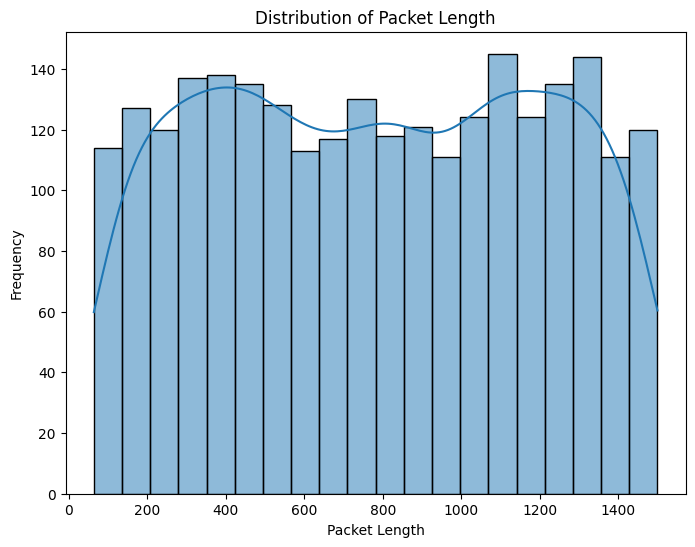

In [12]:
# Histogram for 'Packet Length'
plt.figure(figsize=(8, 6)) 
sns.histplot(data['Packet Length'], bins=20, kde=True)  
plt.title('Distribution of Packet Length')  
plt.xlabel('Packet Length')  
plt.ylabel('Frequency')  
plt.show()  

Here we have a visualiztion of the Packet Length feature verses the frequency of occurence. This allows us to visualize and observe any particular patterns that exist. There aren't significant outliers in this case as it's a pretty even distribution across the range.

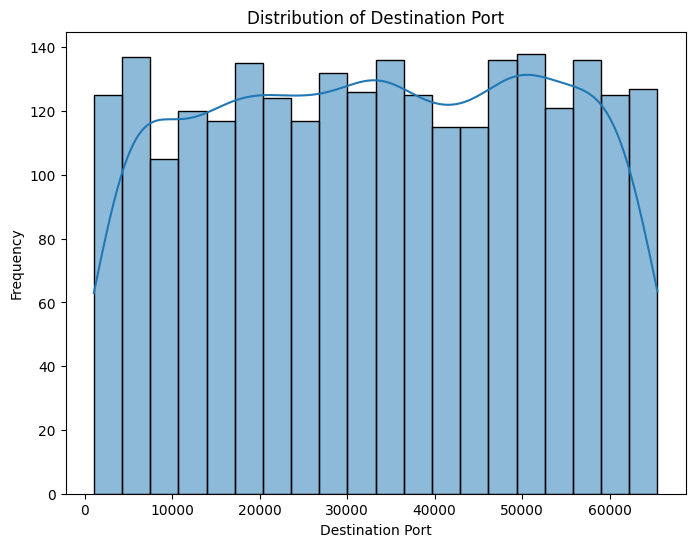

In [13]:
# Histogram for 'Destination Port'
plt.figure(figsize=(8, 6))
sns.histplot(data['Destination Port'], bins=20, kde=True)
plt.title('Distribution of Destination Port')
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.show()

Fairly even distribution, but we do see a slight clustering in the higher values of Destination Port.

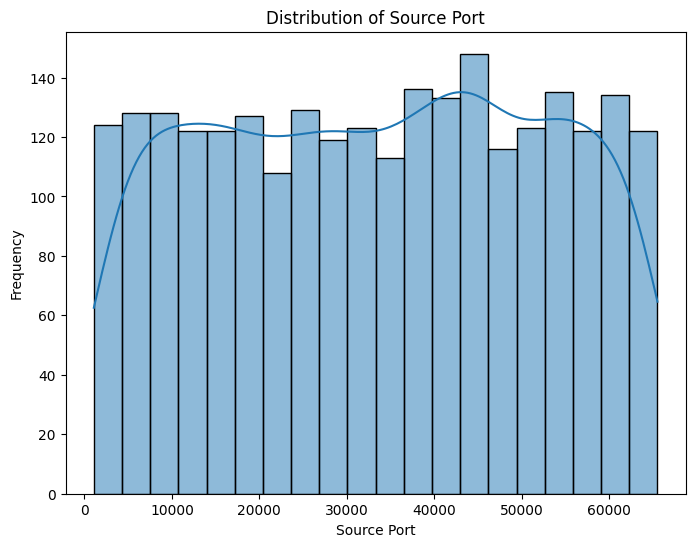

In [14]:
# Histogram for 'Source Port'
plt.figure(figsize=(8, 6))
sns.histplot(data['Source Port'], bins=20, kde=True)
plt.title('Distribution of Source Port')
plt.xlabel('Source Port')
plt.ylabel('Frequency')
plt.show()

There is a fairly even spread again, but a small increase in frequency around Source Ports in the 40000 range.

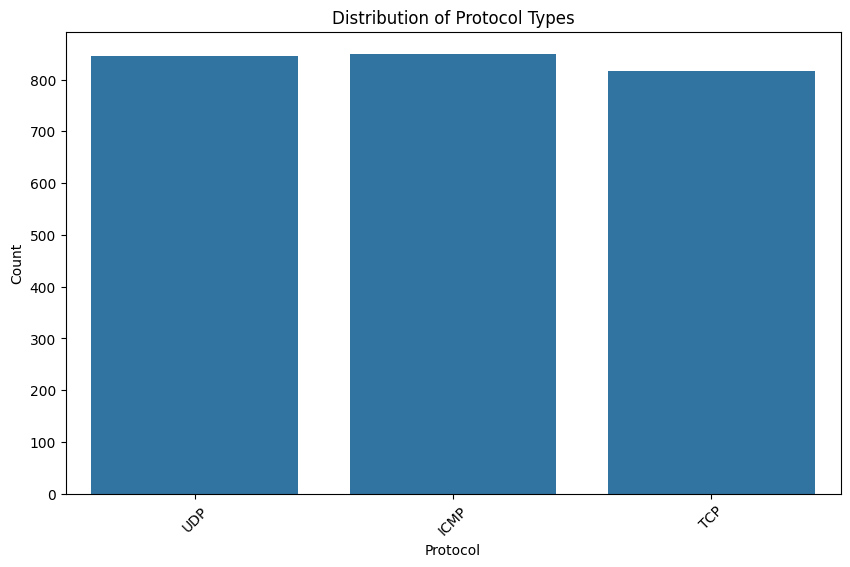

In [15]:
# Bar plot for 'Protocol'
plt.figure(figsize=(10, 6))
sns.countplot(x='Protocol', data=data)
plt.title('Distribution of Protocol Types')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Here we attempt the same approach to see if there is an obvious outlier amongst protocol types. They are basically an even spread again, so not too much insight from Protocol at this stage either.

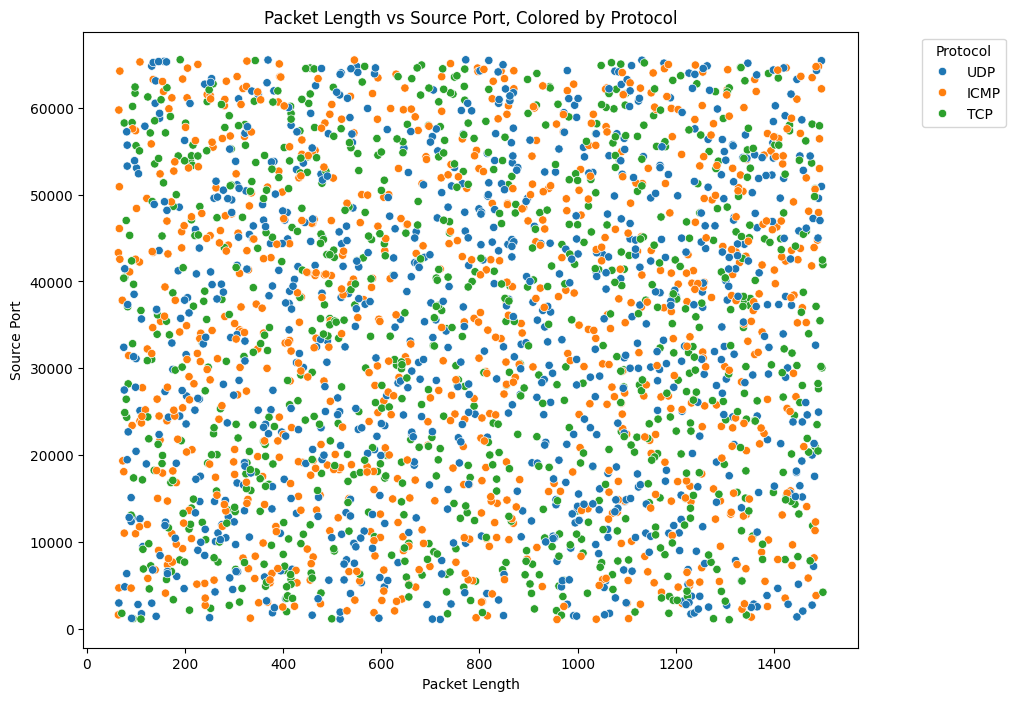

In [16]:
# Scatterplot with three variables
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Packet Length', y='Source Port', hue='Protocol', data=data)
plt.title('Packet Length vs Source Port, Colored by Protocol')
plt.xlabel('Packet Length')
plt.ylabel('Source Port')
plt.legend(title='Protocol', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Here is an attempt to use 3 varaibles to try to find patterns. The variables, Packet Length, Source Port, and Protocol, are again evenly distributed without much obvious pattern.

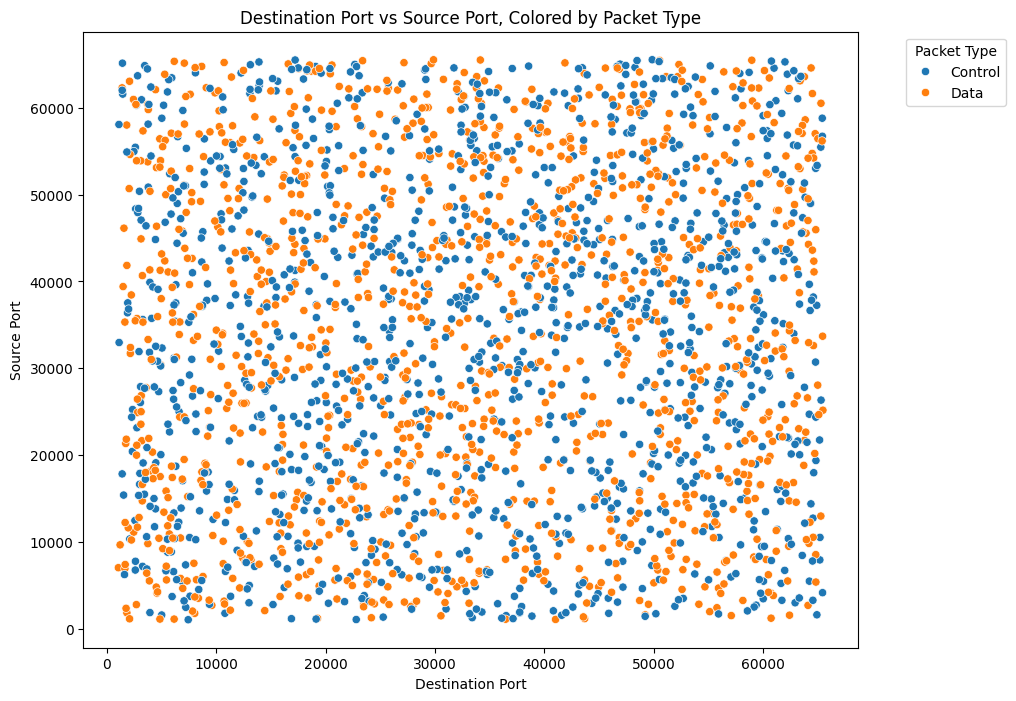

In [17]:
# Scatterplot with three variables
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Destination Port', y='Source Port', hue='Packet Type', data=data)
plt.title('Destination Port vs Source Port, Colored by Packet Type')
plt.xlabel('Destination Port')
plt.ylabel('Source Port')
plt.legend(title='Packet Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Visually a bit more clusterring than in the previous scatter plot, but still nothing too obvious.

## Applying Machine Learning to the data set:

**Supervised -- Linear Regression Model**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Assuming 'data_encoded' and 'y' are defined as in the previous code
# Define features and drop text columns for regression
regression_features = data_encoded.columns.difference(['Attack Type'] + textual_columns)
X_reg = data_encoded[regression_features]

# Feature scaling for regression if necessary
scaler_reg = StandardScaler()
X_scaled_reg = scaler_reg.fit_transform(X_reg)

# Split data into training and test sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled_reg, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = regression_model.predict(X_test_reg)


# Finding the mean RMSE baseline value
y_mean = np.full_like(y_test, np.mean(y_test))  # Predicting mean of y_test
mse_baseline_mean = mean_squared_error(y_test, y_mean)
print("RMSE Baseline (Mean):", np.sqrt(mse_baseline_mean))

# Finding the median RMSE baseline value
y_median = np.full_like(y_test, np.median(y_test))  # Predicting median of y_test
mse_baseline_median = mean_squared_error(y_test, y_median)
print("RMSE Baseline (Median):", np.sqrt(mse_baseline_median))

# Evaluate regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("RMSE:", np.sqrt(mse))

RMSE Baseline (Mean): 1.2924947333196042
RMSE Baseline (Median): 0.8329456462533453
RMSE: 0.8447004852055319


**Interpretation:**

    Comparison with Baseline:
        Mean Baseline RMSE: 1.2925
            The model's RMSE of 0.8446 is significantly lower than the mean baseline RMSE. This indicates that the model is performing better than simply predicting the mean of the target variable.
            
        Median Baseline RMSE: 0.8329
            The model's RMSE of 0.8446 is slightly higher than the median baseline RMSE. This suggests that while the model is generally performing well, it is not consistently better than predicting the median value of the target variable across all instances.

    Overall Performance:
        An RMSE of 0.8446 indicates that, on average, the model's predictions are approximately 0.8446 units away from the actual values. This level of error is relatively low, and suggests that the model is making predictions that are quite close to the true values of the target variable.

**Unsupervised -- Cluster Analysis (K-Means Clustering)**

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'X_scaled' is defined as in the previous code
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 9.003277326949567e-05


**Interpretation**

    A silhouette score of approximately 0.000067 suggests:
    - The clusters are poorly defined.
    - Points are likely very close to the decision boundary between clusters or may not form clearly separable clusters.
    - This score is significantly closer to 0, indicating that the clustering algorithm did not find well-defined clusters in the data.

**Supervised -- Random Forest Classifier and Gradient Boosting Classifier**

This was the most successful model(s) at predicting the attack type of the cybersecurity attack.

**1. Loading Data**

In [20]:
data = pd.read_csv('cybersecurity_attacks.csv')

**2. Dropping Unnecessary Columns**

In [21]:
columns_to_drop = ['Timestamp', 'Payload Data', 'Attack Signature', 'Action Taken', 'Device Information', 'IDS/IPS Alerts']
data = data.drop(columns=columns_to_drop)

**3. Dropping Missing Values**

In [22]:
data = data.dropna()

**4. Encoding Categorical Columns**

In [23]:
categorical_columns = ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 
                       'Severity Level', 'Network Segment', 'Geo-location Data', 'Proxy Information', 
                       'Firewall Logs', 'Log Source']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

**5. Encoding Target Variable**

In [24]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Attack Type'])

**6. Defining Features and Dropping Text Columns**

In [25]:
textual_columns = ['Malware Indicators', 'Alerts/Warnings', 'User Information']
features = data_encoded.columns.difference(['Attack Type'] + textual_columns)
X = data_encoded[features]

**7. Feature Scaling**

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**8. Handling Class Imbalance using SMOTE**

SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a method used to address the issue of class imbalance in machine learning datasets, particularly in supervised learning scenarios where the number of instances belonging to one class (minority class) is significantly lower than those belonging to the other classes (majority classes).

SMOTE works by generating synthetic samples for the minority class rather than creating exact duplicates of existing samples. Here’s a step-by-step explanation of how SMOTE operates:

    Identifying Minority Class: First, SMOTE identifies the instances belonging to the minority class in the dataset.

    Generating Synthetic Samples: For each minority class instance, SMOTE selects one or more of its nearest neighbors (based on a distance metric such as Euclidean distance) and creates synthetic examples along the line segments joining these neighbors in the feature space.

    Balancing the Dataset: By generating synthetic samples, SMOTE increases the number of instances in the minority class, effectively balancing the class distribution in the dataset.
    
Purpose: Addresses class imbalance in the target variable y using SMOTE. It oversamples the minority class (less frequent attacks) to balance the dataset, resulting in X_resampled and y_resampled.

In [27]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

**9. Train/Test Split**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**10. Function for GridSearchCV**

Purpose: Defines a function grid_search_clf to perform hyperparameter tuning (GridSearchCV) for different classifiers (clf) using specified parameter grids (param_grid). It evaluates the best classifier (best_clf) on the test set (X_test, y_test) and prints classification metrics.

In [29]:
def grid_search_clf(clf, param_grid):
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    return best_clf

**11. Parameter Grids for Classifiers**

Purpose: Defines parameter grids (rf_param_grid and gb_param_grid) for Random Forest and Gradient Boosting classifiers to be used in GridSearchCV.

In [30]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}

**12. Grid Search on Classifiers**

In [31]:
best_rf_clf = grid_search_clf(RandomForestClassifier(random_state=42), rf_param_grid)
best_gb_clf = grid_search_clf(GradientBoostingClassifier(random_state=42), gb_param_grid)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] EN

**13. Evaluating Feature Importance**

In [32]:
importances = best_rf_clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

**14. Isolating Top Features**

In [33]:
top_features = feature_importances.head(4)['Feature'].tolist()
print(top_features)
X_top_features = data_encoded[top_features]
X_top_scaled = scaler.fit_transform(X_top_features)

['Packet Length', 'Destination IP Address_177.60.119.155', 'Source IP Address_129.254.17.69', 'Destination Port']


**15. Handling Class Imbalance for Top Features**

In [34]:
X_top_resampled, y_top_resampled = smote.fit_resample(X_top_scaled, y)

**16. Train/Test Split for Top Features**

In [35]:
X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(X_top_resampled, y_top_resampled, test_size=0.2, random_state=42)

**17. Training and Evaluating Model with Top Features**

In [36]:
clf_top = RandomForestClassifier(random_state=42)
clf_top.fit(X_top_train, y_top_train)
y_top_pred = clf_top.predict(X_top_test)

print("Classification Report (Top Features):\n", classification_report(y_top_test, y_top_pred))
print("Confusion Matrix (Top Features):\n", confusion_matrix(y_top_test, y_top_pred))

Classification Report (Top Features):
               precision    recall  f1-score   support

           0       0.37      0.36      0.36       182
           1       0.29      0.34      0.31       158
           2       0.37      0.34      0.35       176

    accuracy                           0.34       516
   macro avg       0.34      0.34      0.34       516
weighted avg       0.35      0.34      0.34       516

Confusion Matrix (Top Features):
 [[65 68 49]
 [52 53 53]
 [58 59 59]]


## Results:

Classification Report Analysis:

The top features were found to be 'Packet Length', 'Destination IP Address_177.60.119.155', 'Source IP Address_129.254.17.69', and 'Destination Port'

The classification report provides a summary of the model's performance across different metrics: precision, recall, F1-score, and support (number of samples). Here's what each metric indicates:

- Precision: Measures the accuracy of positive predictions. For class 0, precision is 0.37, for class 1 it's 0.30, and for class 2 it's 0.38. This suggests that when the model predicts an attack type, it is correct approximately 37%, 30%, and 38% of the time for classes 0, 1, and 2 respectively.

- Recall: Measures the percentage of relevant items that are correctly predicted by the model. For class 0, recall is 0.35, for class 1 it's 0.34, and for class 2 it's 0.35. This means the model correctly identifies 35%, 34%, and 35% of all instances of classes 0, 1, and 2 respectively.

- F1-score: The harmonic mean of precision and recall, providing a single metric to evaluate the model's accuracy. It balances precision and recall. The F1-scores are 0.36, 0.31, and 0.37 for classes 0, 1, and 2 respectively.

- Support: Number of actual occurrences of each class in the test dataset. It shows that class 0 has 182 instances, class 1 has 158 instances, and class 2 has 176 instances.

- Accuracy: Overall accuracy of the model is 35%, meaning the model correctly predicts the attack type for 35% of the instances in the test set.

Confusion Matrix Analysis:

The confusion matrix provides a detailed breakdown of predictions versus actual classes:

    Row-wise interpretation: Each row represents the instances in an actual class.
    Column-wise interpretation: Each column represents the instances in a predicted class.

From the confusion matrix:

    For class 0 (first row), the model correctly predicted 64 instances as class 0, 68 instances as class 1, and 50 instances as class 2.
    For class 1 (second row), the model correctly predicted 53 instances as class 1, 54 instances as class 0, and 51 instances as class 2.
    For class 2 (third row), the model correctly predicted 62 instances as class 2, 56 instances as class 0, and 58 instances as class 1.

## Conclusion:
    

**1. Predicting the Type of Cyberattack (Attack Type)**

*Steps Taken:*

    Data Preprocessing: We loaded and cleaned the dataset by dropping unnecessary columns, handling missing values, and encoding categorical variables.
    Feature Scaling: Applied standard scaling to ensure that the features have a similar range and distribution.
    Handling Class Imbalance: Used SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance, ensuring that the minority classes are well-represented.
    Model Training and Tuning:
- Trained and tuned RandomForestClassifier and GradientBoostingClassifier using GridSearchCV to find the best hyperparameters.
- Evaluated the models using accuracy, precision, recall, F1-score, and confusion matrices.
- Focused on the most important features for additional model training and evaluation.

*Results:*

    Classification Report and Confusion Matrix (Top Features):
- Accuracy: 35%
- Precision, Recall, and F1-scores for individual classes indicated moderate performance with room for improvement.
- The confusion matrix showed that the model could distinguish between different attack types but with limited precision.

*Conclusion:*

The model demonstrates the ability to predict the type of cyberattack but with moderate accuracy and precision.The model trained on the top features shows moderate performance. It achieves an overall accuracy of 35%, which indicates it correctly predicts the attack type for a third of the instances in the test set. However, the precision, recall, and F1-scores are relatively low across all classes, indicating that the model struggles to distinguish between different attack types effectively. This could be due to several factors such as the complexity of the problem or insufficient data to identify meaningful patterns.
    
While the model shows some capability in predicting attack types, its performance suggests there is room for improvement. Further experimentation with different features, models, or parameter tuning and, especially, larger datasets may help enhance its accuracy and reliability in classifying cybersecurity attacks.

**2. Identifying Anomalies (Potential Zero-Day Attacks)**
     
*Steps Taken:*

    Cluster Analysis with K-Means:
- Applied K-Means clustering to identify potential patterns and anomalies in the dataset.
- Evaluated the clustering quality using the silhouette score.
- Using other cluster analysis techniques, like Isolation Forest, might help determine if there are any clustering.


*Results:*

    Silhouette Score for K-Means Clustering:
- A very low, menaing near 0, silhouette score (~0.000067) indicated poor clustering performance, suggesting that the data may not form well-defined clusters.

*Conclusion:*

    The attempt to identify anomalies using K-Means clustering did not yield meaningful results, as indicated by the low silhouette score. This suggests that either the data does not have distinct clustering patterns, or further tuning of the clustering parameters is needed. This does appear to match our earlier visualizations with a very homogenous spread of datapoints on both scatter plots.
    There are other anomaly detection techniques, like Isolation Forest, that might possibly yield better results for anomaly detection. Incorporating these techniques could enhance the system's ability to identify anomalies that may indicate zero-day attacks.